In [1]:
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from copy import deepcopy
import multidop
import pyart
import tempfile
import os
import glob
import time


from pycwr.io.auto_io import radar_io 
import numpy as np
import pandas as pd
import xarray as xr
import pyart

f1 = r"/home/liyuan3970/study_demo/met_plot/rader/pup/pintu/Z_RADR_I_Z9571_20190809172500_O_DOR_SA_CAP.bin.bz2"
f2 = r"/home/liyuan3970/study_demo/met_plot/rader/pup/pintu/Z_RADR_I_Z9577_20190809172500_O_DOR_SA_CAP.bin.bz2"

# f1 = "src/Z_RADR_I_Z9577_20190809162900_O_DOR_SA_CAP.bin.bz2"

basedata1 = radar_io(f1) 
basedata2 = radar_io(f2)

r1 = basedata1.ToPyartRadar()
r2 = basedata2.ToPyartRadar()


cp1 = deepcopy(r1.fields['reflectivity']['data'])
r1.add_field_like('reflectivity', 'DT', cp1, replace_existing=True)
gatefilter1 = pyart.correct.GateFilter(r1)
gatefilter1.exclude_masked('reflectivity')
corr_vel1 = pyart.correct.dealias_region_based(
    r1, vel_field='velocity', keep_original=False, 
    gatefilter=gatefilter1, centered=True)
r1.add_field('VT', corr_vel1, replace_existing=True)



cp2 = deepcopy(r2.fields['reflectivity']['data'])
r2.add_field_like('reflectivity', 'DT', cp2, replace_existing=True)
gatefilter2 = pyart.correct.GateFilter(r2)
gatefilter2.exclude_masked('reflectivity')
corr_vel2 = pyart.correct.dealias_region_based(
    r2, vel_field='velocity', keep_original=False, 
    gatefilter=gatefilter2, centered=True)
r2.add_field('VT', corr_vel2, replace_existing=True)



# The analysis engine currently expects the "missing_value" attribute
r1.fields['DT']['missing_value'] = 1.0 * r1.fields['DT']['_FillValue']
r2.fields['DT']['missing_value'] = 1.0 * r2.fields['DT']['_FillValue']
r1.fields['VT']['missing_value'] = 1.0 * r1.fields['VT']['_FillValue']
r2.fields['VT']['missing_value'] = 1.0 * r2.fields['VT']['_FillValue']


def grid_radar(radar, grid_shape=(20, 301, 301), xlim=(-150000, 150000),
               ylim=(-150000, 150000), zlim=(1000, 20000),
               fields=['DT', 'VT'], origin=None):
    bt = time.time()
    radar_list = [radar]
    if origin is None:
        origin = (radar.latitude['data'][0],
                  radar.longitude['data'][0])
    grid = pyart.map.grid_from_radars(
        radar_list, grid_shape=grid_shape,
        grid_limits=(zlim, ylim, xlim),
        grid_origin=origin, fields=fields,
        gridding_algo='map_gates_to_grid', grid_origin_alt=0.0)
    print(time.time()-bt, 'seconds to grid radar')
    return grid

# g1 = grid_radar(r1, origin=(r2.latitude['data'][0], r2.longitude['data'][0]))
# g2 = grid_radar(r2, origin=(r2.latitude['data'][0], r2.longitude['data'][0]))

#pyart.io.write_grid('g1.nc', g1)
#pyart.io.write_grid('g2.nc', g2)

radars1 =[r1,r2]
grids1 = pyart.map.grid_from_radars(
         radars1, grid_shape=(46, 251, 251),
        grid_limits=((0, 15000.0),(-150000, 150000), (-150000, 150000)),
        fields=['reflectivity','DT','VT'], gridding_algo="map_gates_to_grid",
        weighting_function='BARNES')

# radars2 =[r2]
# grids2 = pyart.map.grid_from_radars(
#          radars2, grid_shape=(46, 251, 251),
#         grid_limits=((0, 15000.0),(-150000, 150000), (-150000, 150000)),
#         fields=['reflectivity','DT','VT'], gridding_algo="map_gates_to_grid",
#         weighting_function='BARNES')


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pandas/core/dtypes/inference.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pandas/core/tools/datetimes.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if not isinstance(key, collections.Hashable):
/home/liyuan3970/anaconda3/lib/python3.7/site-packages/h5py/_hl/base.py:19: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.a

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/pydda/retrieval/angles.py:24: RuntimeWarning: invalid value encountered in arccos
  elev = np.arccos((Re**2 + slantrsq - rh**2)/(2 * Re * slantr))


Starting solver 
rmsVR = 15.727190779171696
Total points: 1904537
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  33.8231|1210.4672|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  29.4614
Norm of gradient: 0.010087893914858178
Iterations before filter: 10
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  19.7981|1009.8298|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  28.3955
Norm of gradient: 0.010260347272678497
Iterations before filter: 20
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  13.1076| 944.7114|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  30.7803
Norm of gradient: 0.008042944426501102
Iterations before filter: 30
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  13.1076| 944.7114|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  30.7803
Norm of gradient: 0.008042944426501102
Iterations before filter: 40
Applying low pass 

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|34830.8425| 935.7495|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  17.4587
Norm of gradient: 0.5894534210053394
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|34270.8260| 935.7426|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  17.4590
Norm of gradient: 0.5844070428302791
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
| 102.9816|1757.9056|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  17.8530
Norm of gradient: 0.03287501231715383
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  70.3648|1538.8869|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  18.0664
Norm of gradient: 0.026675285749907435
| Jvel    | Jmass   | Jsmooth |   Jbg   | Jvort   | Jmodel  | Jpoint  | Max w  
|  57.9266|1419.7408|   0.0000|   0.0000|   0.0000|   0.0000|   0.0000|  18.5808
Norm of gradient: 0.017269886584370318
| J

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:942: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


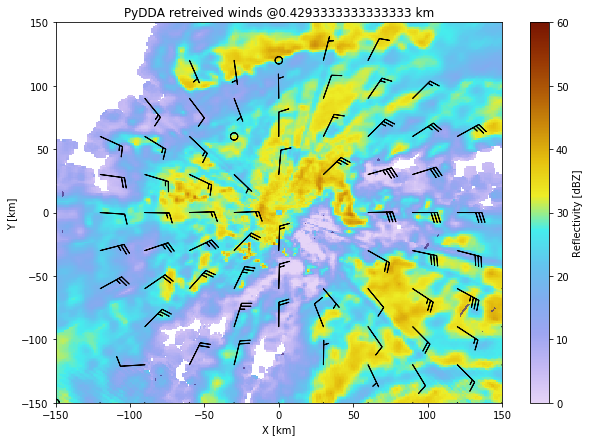

In [3]:
import pyart
import pydda
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Set initialization and do retrieval
u_init, v_init, w_init = pydda.initialization.make_constant_wind_field(grids1, vel_field='VT')

new_grids = pydda.retrieval.get_dd_wind_field([grids1],
                                              u_init, v_init, w_init,
                                              vel_name='VT', refl_field='DT',
                                              mask_outside_opt=True)
# Make a neat plot
fig = plt.figure(figsize=(10,7))
ax = pydda.vis.plot_horiz_xsection_barbs(new_grids, background_field='DT', 
                                        level=1,vmin=0, vmax=60,
                                        w_vel_contours=[3, 6, 9, 12, 15],
                                        barb_spacing_x_km=30.0,
                                        barb_spacing_y_km=30.0)
#ax.set_xticks(np.arange(150.5, 153, 0.1))
#ax.set_yticks(np.arange(-36, -32.0, 0.1))
#ax.set_xlim([151.0, 151.35])
#ax.set_ylim([-34.15, -33.9])
plt.show(ax)
